# Práctica 1: Reglas de Asociación

Vamos a seguir la metodología CRISP-DM para la correcta resolución del problema.

## 1. Comprensión del negocio

El objetivo es encontrar patrones de compra en un supermercado para entender cómo los productos se compran juntos. Esto puede ayudar en la disposición de los productos, en las promociones cruzadas, y en mejorar la experiencia de compra de los clientes.

## 2. Comprensión de los datos

 Nuestro dataset se trata de transacciones de un supermercado, donde cada fila representa los productos comprados en una transacción individual.

Importamos todas las librerías que vamos a necesitar a lo largo de la práctica

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from collections import Counter

C:\Users\Rubén\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Rubén\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\Rubén\AppData\Local\Temp\ipykernel_18688\2459337081.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pa

In [2]:
df = pd.read_csv("Market_Basket_Optimisation.csv", sep = ",")

In [3]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


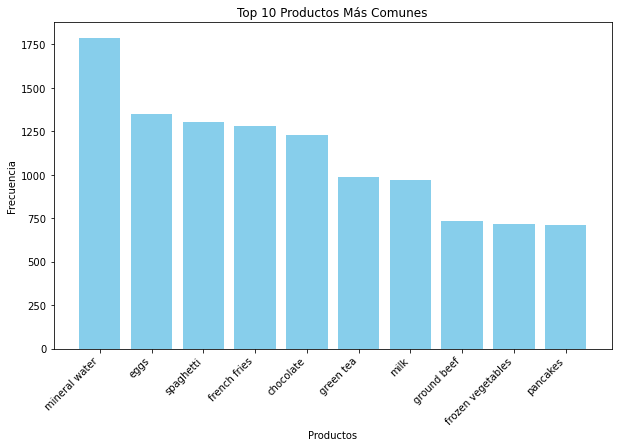

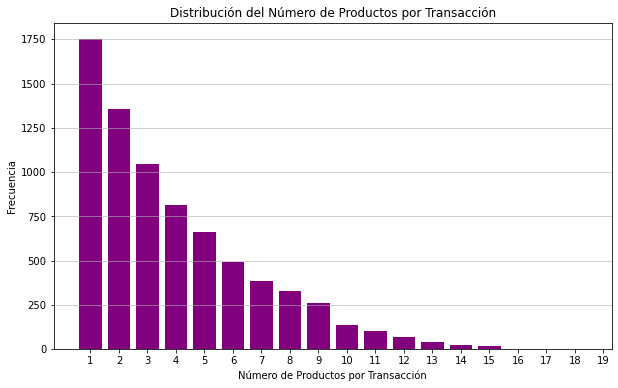

In [4]:
transactions = df.apply(lambda x: x.dropna().tolist(), axis=1).tolist()

contador = Counter([item for sublist in transactions for item in sublist])

productos_comunes = contador.most_common(10)
products, frequencies = zip(*productos_comunes)

plt.figure(figsize=(10, 6))
plt.bar(products, frequencies, color='skyblue')
plt.xlabel('Productos')
plt.ylabel('Frecuencia')
plt.title('Top 10 Productos Más Comunes')
plt.xticks(rotation=45, ha="right")
plt.show()

num_productos_transaccion = [len(transaction) for transaction in transactions]

plt.figure(figsize=(10, 6))
plt.hist(num_productos_transaccion, bins=np.arange(1, max(num_productos_transaccion)+1)-0.5, color='purple', rwidth=0.8)
plt.xlabel('Número de Productos por Transacción')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Productos por Transacción')
plt.xticks(np.arange(1, max(num_productos_transaccion)+1))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [5]:
encoder = TransactionEncoder()
transactions_encoded = encoder.fit_transform(transactions)
transactions_df = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

transactions_df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
k1 = apriori(transactions_df, min_support=0.01, use_colnames=True, max_len=1)

k1.head()

,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.010800,(barbecue sauce)
3,0.014267,(black tea)
4,0.011467,(body spray)


In [7]:
k2 = apriori(transactions_df, min_support=0.01, use_colnames=True, max_len=2)

k2.head()

,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.010800,(barbecue sauce)
3,0.014267,(black tea)
4,0.011467,(body spray)


In [8]:
frequent_itemsets = apriori(transactions_df, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.020267,(almonds),1
1,0.033200,(avocado),1
2,0.010800,(barbecue sauce),1
3,0.014267,(black tea),1
4,0.011467,(body spray),1
...,...,...,...
254,0.011067,"(milk, mineral water, ground beef)",3
255,0.017067,"(ground beef, mineral water, spaghetti)",3
256,0.015733,"(milk, mineral water, spaghetti)",3
257,0.010267,"(olive oil, mineral water, spaghetti)",3


In [9]:
reglas = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

reglas_alta_confianza = reglas[reglas['confidence'] > 0.45]

antecedentes = reglas_alta_confianza['antecedents'].apply(lambda x: list(x)).tolist()
consecuentes = reglas_alta_confianza['consequents'].apply(lambda x: list(x)).tolist()

for index, (antecedent, consequent) in enumerate(zip(antecedentes, consecuentes)):
    print(f"Regla {index + 1}: Antecedente: {antecedent} => Consecuente: {consequent}")

Regla 1: Antecedente: ['soup'] => Consecuente: ['mineral water']
Regla 2: Antecedente: ['chocolate', 'ground beef'] => Consecuente: ['mineral water']
Regla 3: Antecedente: ['eggs', 'ground beef'] => Consecuente: ['mineral water']
Regla 4: Antecedente: ['frozen vegetables', 'milk'] => Consecuente: ['mineral water']
Regla 5: Antecedente: ['milk', 'ground beef'] => Consecuente: ['mineral water']
Regla 6: Antecedente: ['pancakes', 'spaghetti'] => Consecuente: ['mineral water']


In [10]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(k2, metric="confidence", min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,0.003556,1.163629,0.320785
1,(mineral water),(avocado),0.238267,0.033200,0.011467,0.048125,1.449559,0.003556,1.015680,0.407144
2,(burgers),(cake),0.087200,0.081067,0.011467,0.131498,1.622103,0.004398,1.058068,0.420154
3,(cake),(burgers),0.081067,0.087200,0.011467,0.141447,1.622103,0.004398,1.063185,0.417349
4,(burgers),(chocolate),0.087200,0.163867,0.017067,0.195719,1.194377,0.002777,1.039603,0.178291
...,...,...,...,...,...,...,...,...,...,...
329,(spaghetti),(tomatoes),0.174133,0.068400,0.020933,0.120214,1.757520,0.009023,1.058894,0.521896
330,(spaghetti),(turkey),0.174133,0.062533,0.016533,0.094946,1.518333,0.005644,1.035813,0.413363
331,(turkey),(spaghetti),0.062533,0.174133,0.016533,0.264392,1.518333,0.005644,1.122700,0.364155
332,(whole wheat rice),(spaghetti),0.058533,0.174133,0.014133,0.241458,1.386626,0.003941,1.088755,0.296160


In [20]:
high_confidence_rules = rules[rules['confidence'] > 0.35] 
print(high_confidence_rules)

             antecedents      consequents  antecedent support  \
44             (cereals)  (mineral water)            0.025733   
59             (chicken)  (mineral water)            0.060000   
117        (cooking oil)  (mineral water)            0.051067   
208  (frozen vegetables)  (mineral water)            0.095333   
247        (ground beef)  (mineral water)            0.098267   
254        (ground beef)      (spaghetti)            0.098267   
272               (milk)  (mineral water)            0.129600   
290          (olive oil)  (mineral water)            0.065733   
292           (pancakes)  (mineral water)            0.095067   
295           (red wine)  (mineral water)            0.028133   
297             (salmon)  (mineral water)            0.042400   
301               (soup)  (mineral water)            0.050533   
304           (tomatoes)  (mineral water)            0.068400   
319           (red wine)      (spaghetti)            0.028133   

     consequent support 

$\textbf{Relación entre Aguacate y Agua Mineral}$

Hemos descubierto que cuando tus clientes compran aguacate, hay una buena probabilidad (34.54%) de que también compren agua mineral durante la misma visita. Aunque solo el 3.32% de todas tus transacciones incluyen aguacate, y el agua mineral aparece en el 23.83% de ellas, la combinación de estos dos productos ocurre más frecuentemente de lo que esperaríamos por casualidad. Esto sugiere que promocionar o colocar juntos el aguacate y el agua mineral podría animar a más clientes a comprar ambos productos cuando inicialmente podrían haber planeado comprar solo uno de ellos.

$\textbf{Compras Complementarias con Hamburguesas}$

Nuestro análisis también reveló que las hamburguesas tienen una relación especial con varios productos: huevos, patatas fritas, té verde y leche. Por ejemplo, en aproximadamente un tercio de las veces que se compran hamburguesas, los huevos también forman parte de la compra. Esto indica una oportunidad para promociones cruzadas o para considerar la colocación estratégica de estos productos cerca de uno al otro.

$\textbf{Interpretación y Acciones Sugeridas}$

- **Productos Complementarios:** La relación entre aguacate y agua mineral, así como las varias asociaciones encontradas con las hamburguesas, nos indican que ciertos productos tienden a ser comprados juntos. Esto ofrece una oportunidad perfecta para crear ofertas especiales, como descuentos por compra conjunta o colocar estos productos en proximidad en los estantes para incentivar la venta cruzada.

- **Planificación Estratégica de Inventario y Promociones:** Conocer qué productos son comprados juntos te permite planificar con anticipación y asegurarte de que estos productos estén siempre disponibles y bien abastecidos. Además, puedes diseñar campañas de marketing enfocadas en estas combinaciones de productos para impulsar las ventas.

- **Tendencias de Compra Significativas:** Nuestro análisis demuestra que estas no son coincidencias; las métricas sugieren fuertemente que hay una tendencia subyacente en el comportamiento de compra de tus clientes. Esto te da una base sólida sobre la cual construir tus estrategias de marketing y de colocación de productos.

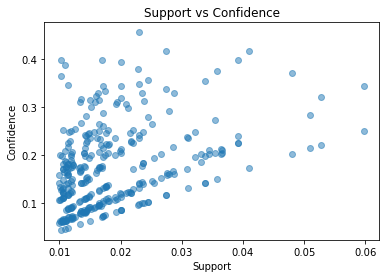

In [12]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

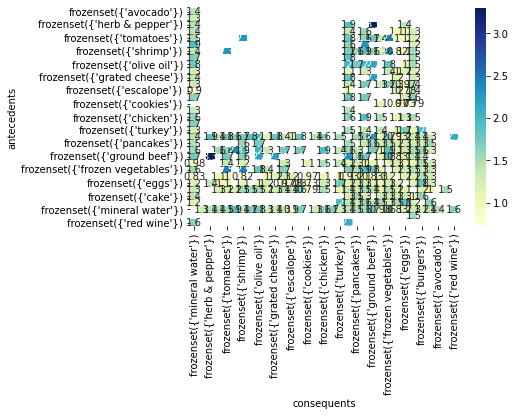

In [13]:
pivot = rules.pivot(index='antecedents', columns='consequents', values='lift')

sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.show()